In [1]:
import scanpy as sc
import os
import pandas as pd
import pickle as pkl
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.5.1 anndata==0.7.3 umap==0.4.3 numpy==1.18.1 scipy==1.4.1 pandas==1.0.3 scikit-learn==0.22.1 statsmodels==0.11.1


/home/sliang3/miniconda3/envs/scanpy/lib/python3.8/site-packages/umap/spectral.py:4: NumbaDeprecationWarning: No direct replacement for 'numba.targets' available. Visit https://gitter.im/numba/numba-dev to request help. Thanks!
  import numba.targets


# Read Data

Read data using loom

In [3]:
# adata = sc.read_loom("../data/PDAC/scRNA_fna_SeuratObject_ALL.loom")

In [4]:
# with open("../data/PDAC/scRNA_fna_SeuratObject_ALL.pkl", 'wb') as file:
#     pkl.dump(obj=adata, file=file)

In [5]:
with open("../data/PDAC/scRNA_fna_SeuratObject_ALL.pkl", 'rb') as file:
    adata = pkl.load(file)

In [6]:
adata

AnnData object with n_obs × n_vars = 31720 × 24422
    obs: 'ClusterID', 'ClusterName', 'G2M_Score', 'Phase', 'S_Score', 'cell_type', 'integrated_snn_res_0_5', 'nCount_RNA', 'nFeature_RNA', 'orig_ident', 'percent_mt', 'seurat_clusters', 'stage'
    var: 'Selected', 'vst_mean', 'vst_variable', 'vst_variance', 'vst_variance_expected', 'vst_variance_standardized'
    layers: 'norm_data'

In [7]:
adata.obs

,ClusterID,ClusterName,G2M_Score,Phase,S_Score,cell_type,integrated_snn_res_0_5,nCount_RNA,nFeature_RNA,orig_ident,percent_mt,seurat_clusters,stage
AAACCTGGTTCCCTTG_1,3,Myeloid,-0.139026,G1,-0.102319,Myeloid,8,7110.0,2112,P1,4.289733,8,Primary
AAACGGGCAATCCGAT_1,3,Myeloid,0.005527,G2M,-0.019100,Myeloid,11,862.0,436,P1,29.118330,11,Primary
AAACGGGTCGAATCCA_1,2,T,0.014605,G2M,-0.015689,T,3,919.0,484,P1,7.508161,3,Primary
AAAGATGTCCACTCCA_1,2,T,-0.022346,S,0.006563,T,3,1432.0,706,P1,7.262570,3,Primary
AAAGATGTCTGCGTAA_1,2,T,-0.025140,S,0.003153,T,0,1675.0,686,P1,4.059701,0,Primary
...,...,...,...,...,...,...,...,...,...,...,...,...,...
attagtatagcgcgttat_9,1,Epithelial,-0.015158,G1,-0.012173,Epithelial,6,449.0,269,PM,0.000000,6,Metastasis
ccacgcgtacagaccttc_9,1,Epithelial,0.001490,S,0.081848,Epithelial,6,448.0,272,PM,0.000000,6,Metastasis
gctcccagtaaaggtagg_9,1,Epithelial,-0.011416,G1,-0.010956,Epithelial,5,446.0,293,PM,0.000000,5,Metastasis
tgaatttgcggtgtacag_9,1,Epithelial,-0.031338,G1,-0.006695,Epithelial,2,446.0,291,PM,0.000000,2,Metastasis


# T cells

In [8]:
lymphocytes = adata[adata.obs.ClusterName.isin(['T'])]
lymphocytes

View of AnnData object with n_obs × n_vars = 8879 × 24422
    obs: 'ClusterID', 'ClusterName', 'G2M_Score', 'Phase', 'S_Score', 'cell_type', 'integrated_snn_res_0_5', 'nCount_RNA', 'nFeature_RNA', 'orig_ident', 'percent_mt', 'seurat_clusters', 'stage'
    var: 'Selected', 'vst_mean', 'vst_variable', 'vst_variance', 'vst_variance_expected', 'vst_variance_standardized'
    layers: 'norm_data'

/home/sliang3/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:00)


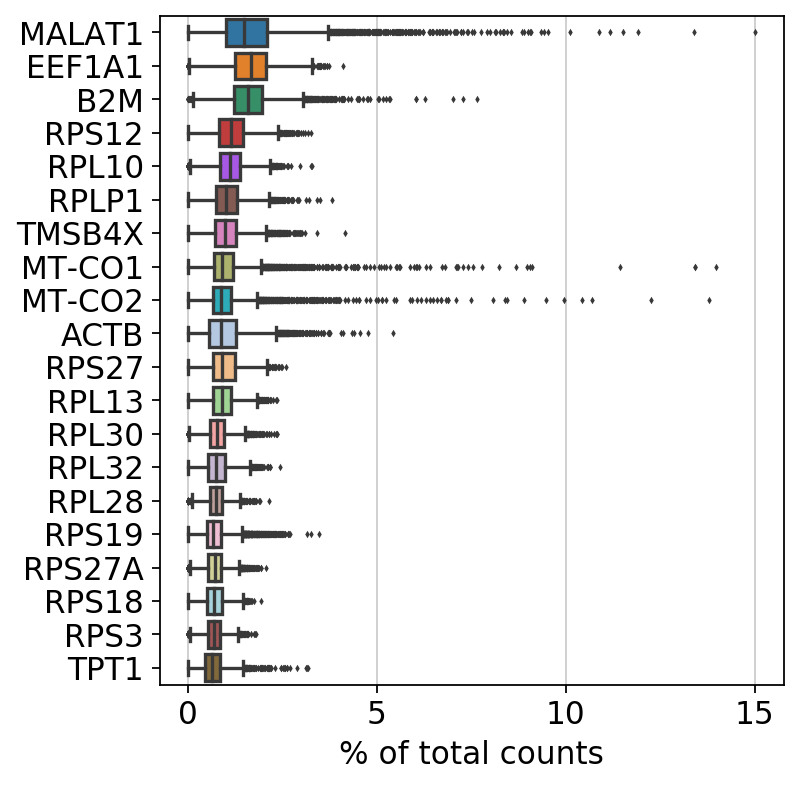

In [9]:
sc.pl.highest_expr_genes(lymphocytes, n_top=20)

In [10]:
sc.pp.filter_cells(lymphocytes, min_genes=200)
sc.pp.filter_genes(lymphocytes, min_cells=3)

filtered out 7445 genes that are detected in less than 3 cells


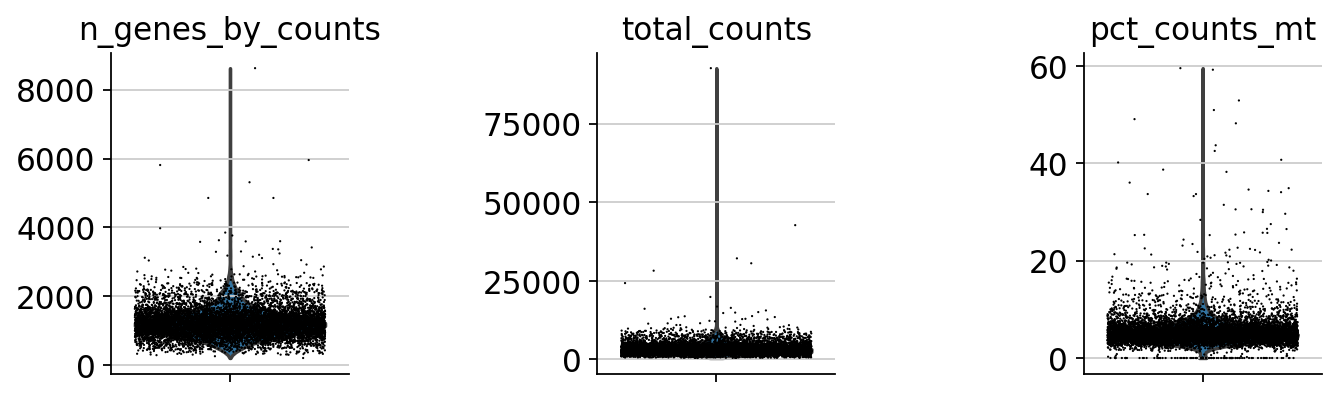

In [11]:
lymphocytes.var['mt'] = lymphocytes.var.index.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(lymphocytes, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
sc.pl.violin(lymphocytes, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)

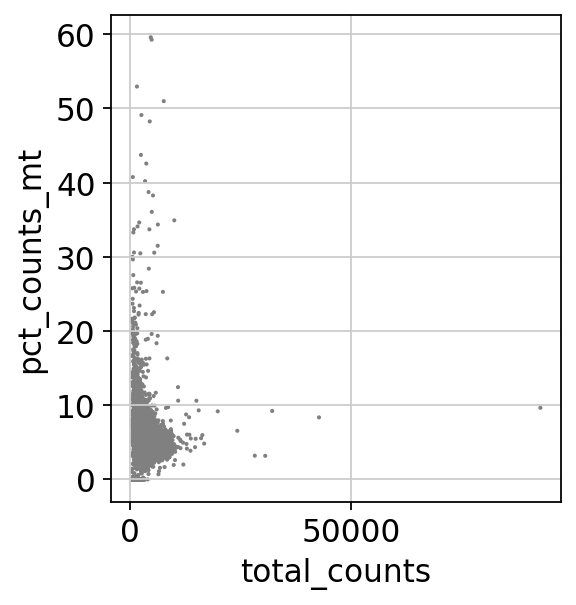

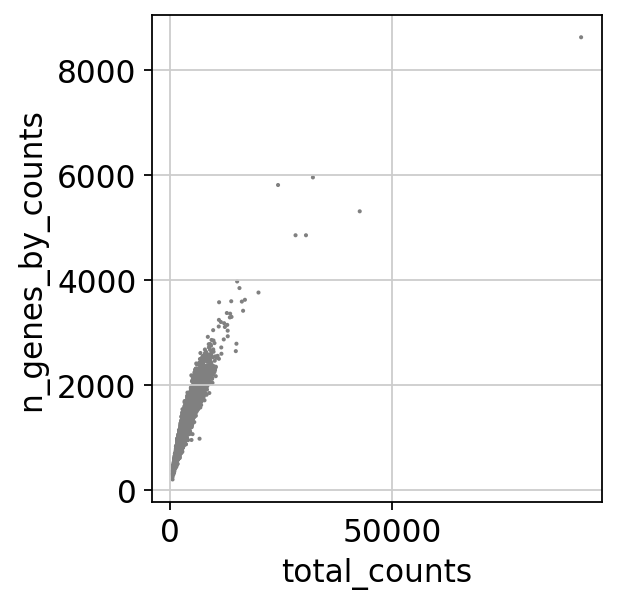

In [12]:
sc.pl.scatter(lymphocytes, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(lymphocytes, x='total_counts', y='n_genes_by_counts')

In [13]:
lymphocytes = lymphocytes[(lymphocytes.obs.pct_counts_mt < 20) & (lymphocytes.obs.n_genes_by_counts < 4000) , :]
lymphocytes

View of AnnData object with n_obs × n_vars = 8813 × 16977
    obs: 'ClusterID', 'ClusterName', 'G2M_Score', 'Phase', 'S_Score', 'cell_type', 'integrated_snn_res_0_5', 'nCount_RNA', 'nFeature_RNA', 'orig_ident', 'percent_mt', 'seurat_clusters', 'stage', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'Selected', 'vst_mean', 'vst_variable', 'vst_variance', 'vst_variance_expected', 'vst_variance_standardized', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    layers: 'norm_data'

In [14]:
sc.pp.normalize_total(lymphocytes, target_sum=1e4)
sc.pp.log1p(lymphocytes)
sc.pp.scale(lymphocytes, max_value=10)

/home/sliang3/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:00)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


extracting highly variable genes
    finished (0:00:02)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


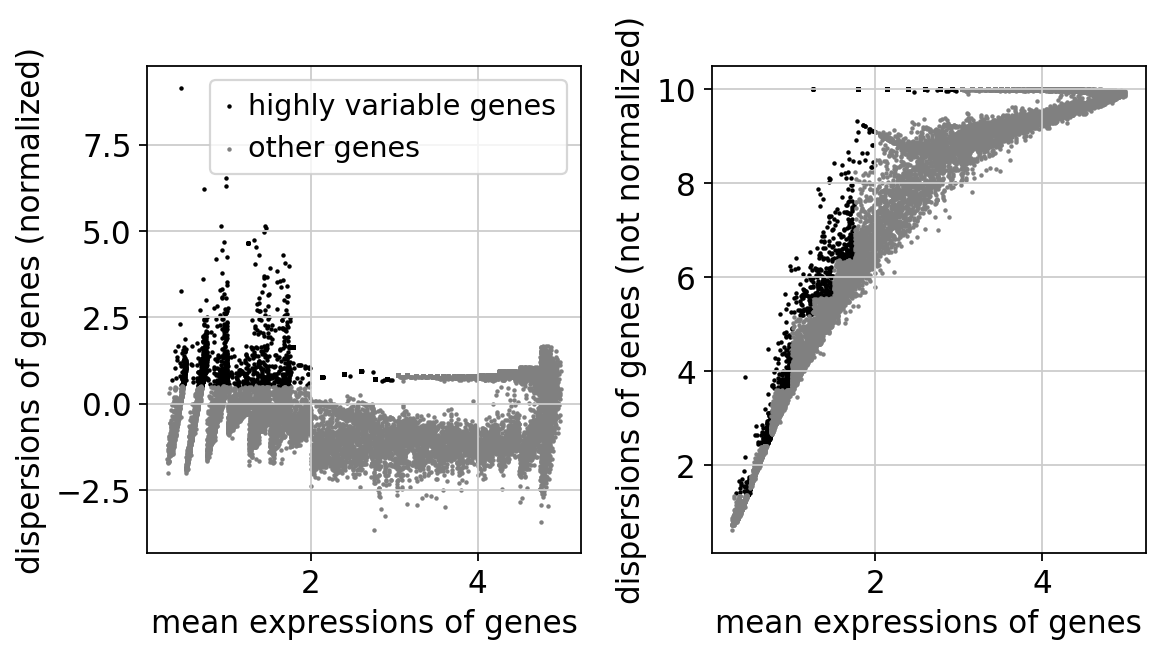

In [15]:
sc.pp.highly_variable_genes(lymphocytes, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(lymphocytes)

In [16]:
lymphocytes.raw = lymphocytes
lymphocytes = lymphocytes[:, lymphocytes.var.highly_variable]
lymphocytes

View of AnnData object with n_obs × n_vars = 8813 × 3540
    obs: 'ClusterID', 'ClusterName', 'G2M_Score', 'Phase', 'S_Score', 'cell_type', 'integrated_snn_res_0_5', 'nCount_RNA', 'nFeature_RNA', 'orig_ident', 'percent_mt', 'seurat_clusters', 'stage', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'Selected', 'vst_mean', 'vst_variable', 'vst_variance', 'vst_variance_expected', 'vst_variance_standardized', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mean', 'std', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p'
    layers: 'norm_data'

# Dimensional Reduction

## PCA

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:04)


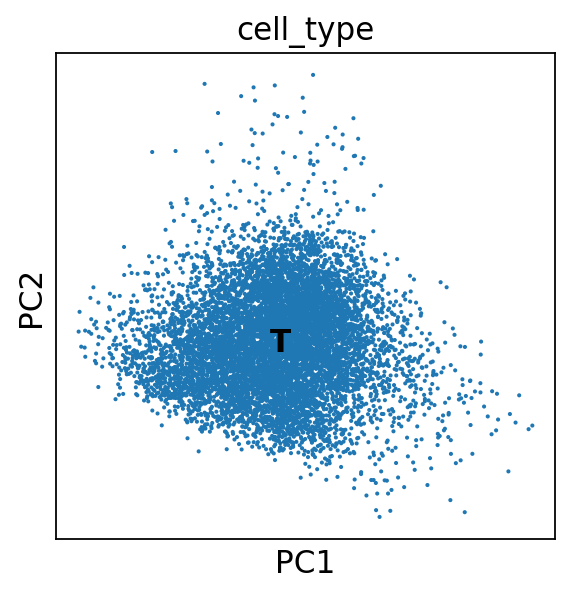

In [17]:
sc.tl.pca(lymphocytes, svd_solver='arpack')
sc.pl.pca(lymphocytes, color='cell_type', legend_loc='on data')

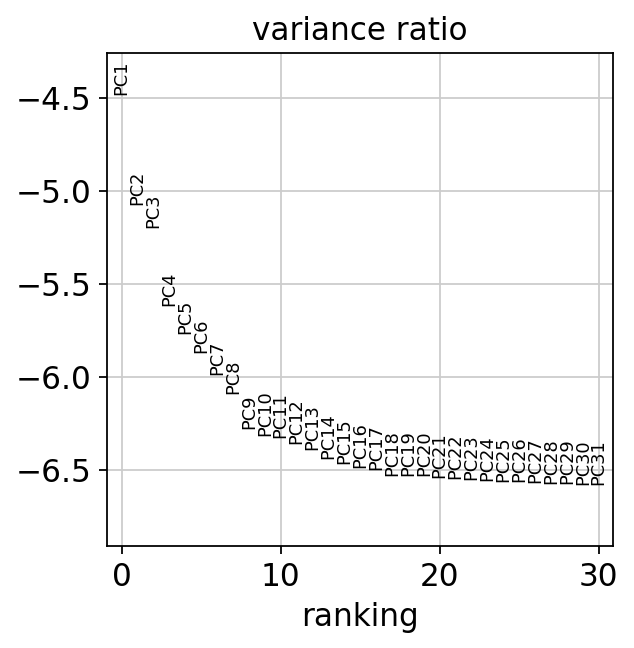

In [18]:
sc.pl.pca_variance_ratio(lymphocytes, log=True)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:14)


/home/sliang3/miniconda3/envs/scanpy/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/sliang3/miniconda3/envs/scanpy/lib/python3.8/site-packages/numpy/core/_methods.py:153: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/home/sliang3/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/preprocessing/_utils.py:11: RuntimeWarning: Mean of empty slice.
  mean_sq = np.multiply(X, X).mean(axis=axis, dtype=np.float64)
/home/sliang3/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:400: RuntimeWarning: invalid value encountered in true_divide
  scores[imask, :] = (scores[imask, :] - (ns[imask] * (n_cells + 1) / 2)) / sqrt(
/home/sliang3/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/__init__.py:318: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transform

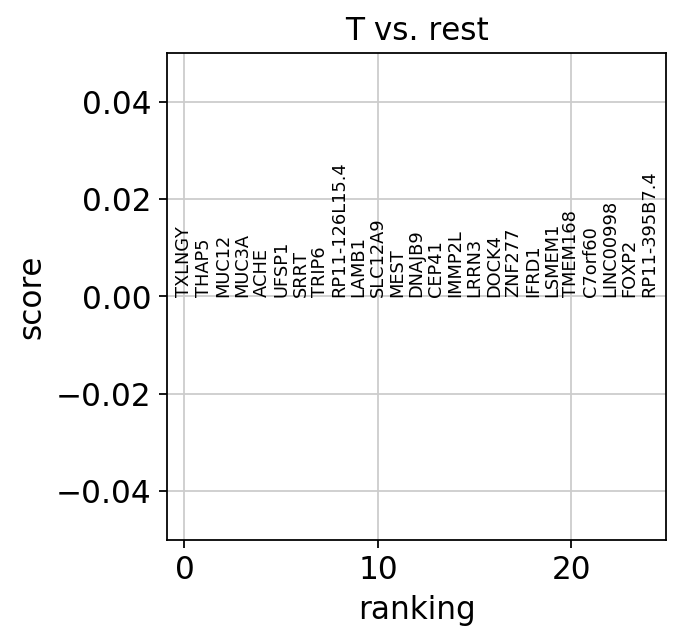

In [19]:
sc.tl.rank_genes_groups(lymphocytes, 'cell_type', method='wilcoxon')
sc.pl.rank_genes_groups(lymphocytes, n_genes=25, sharey=False)

## UMAP

In [20]:
sc.pp.neighbors(lymphocytes)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:07)


In [21]:
sc.tl.umap(lymphocytes)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:17)


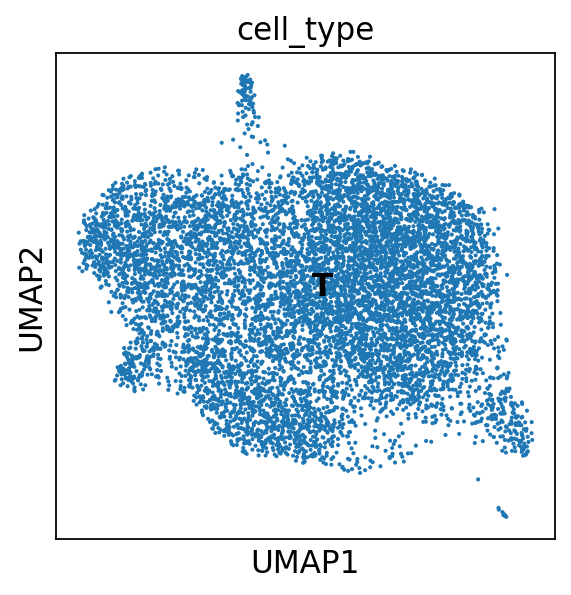

In [22]:
sc.pl.umap(lymphocytes, color='cell_type', legend_loc='on data')

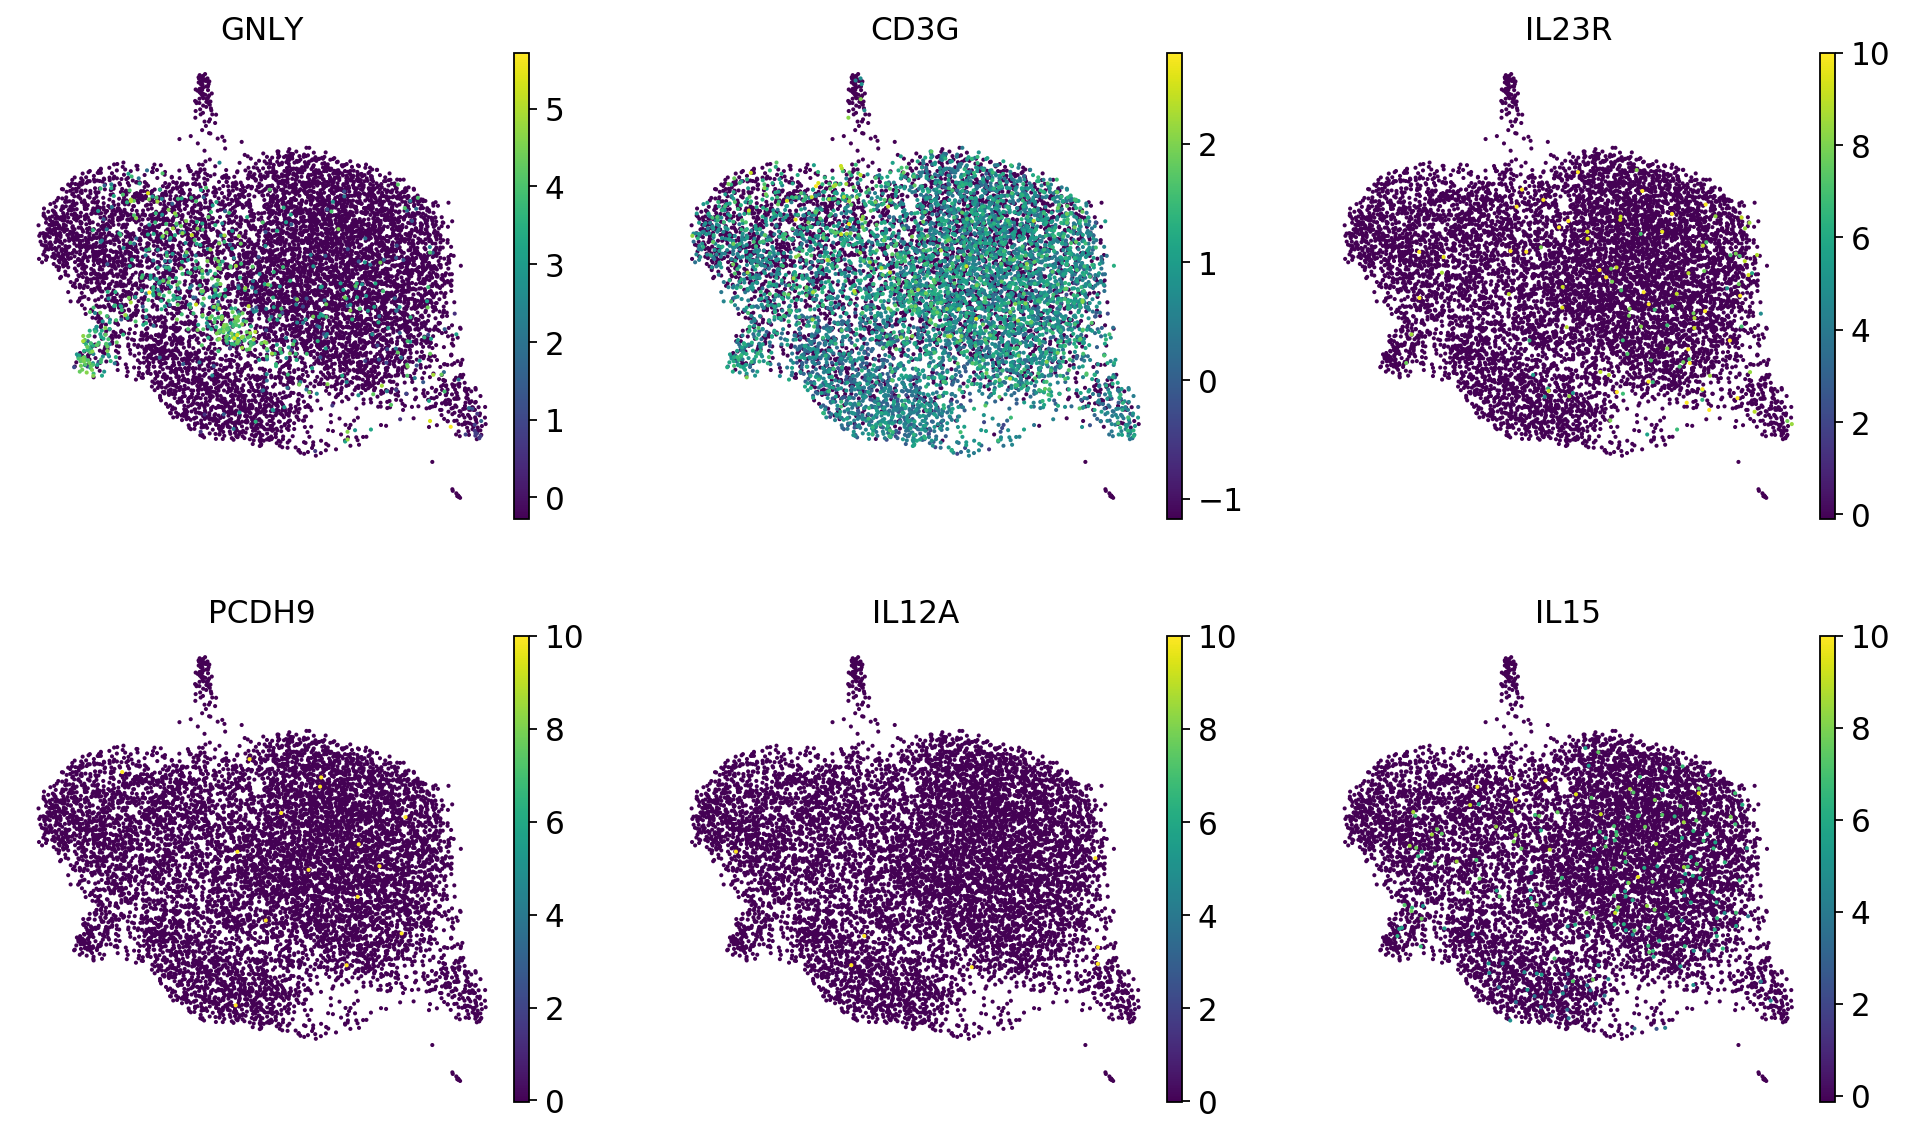

In [24]:
markers = ["GNLY", "CD3G", "IL23R", "PCDH9", 'IL12A', "IL15"]
sc.pl.umap(lymphocytes.raw.to_adata(), color=markers, legend_loc='on data', frameon=False, ncols=3)